In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [5]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [6]:
data = pd.read_csv(url)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
desc = data.describe()
desc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


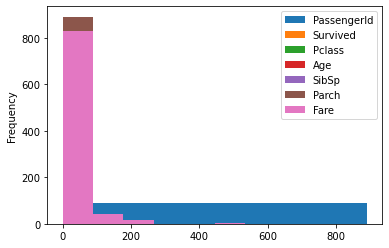

In [17]:
data.plot(kind = 'hist')

In [24]:
data['Age'].fillna(method = 'pad', inplace = True)

In [27]:
data['Age'].isna().sum()

0

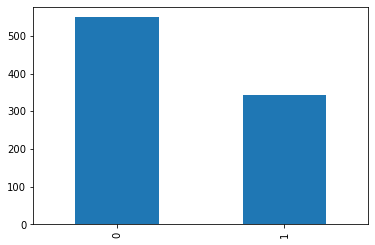

In [35]:
data['Survived'].value_counts().plot( kind='bar')

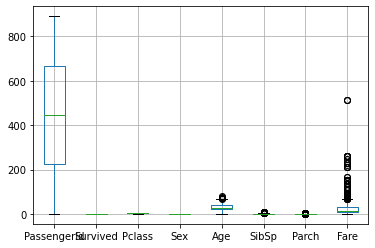

In [65]:
data.boxplot()

In [69]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.026653,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.065571,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.291157,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.058415,-0.114631,-0.245489,-0.182333
Age,0.026653,-0.065571,-0.291157,0.058415,1.000000,-0.206104,-0.165191,0.083417
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.206104,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.165191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.083417,0.159651,0.216225,1.000000


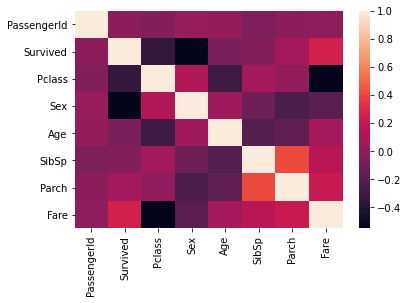

In [81]:
import seaborn as sns
sns.heatmap(data.corr())

In [46]:
lbr = preprocessing.LabelEncoder()
data['Sex'] = lbr.fit_transform(data['Sex'])

In [47]:
data['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [50]:
features = ['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare'] 

In [51]:
X= data[features]
y = data['Survived']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Training Logistic

In [57]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = lgr.predict(X_test)

In [59]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       117
           1       0.65      0.73      0.69        62

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.78      0.77      0.77       179



## Decision Tree Classifier

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
y_tree = classifier.predict(x_test)

In [77]:
y_trial = classifier.predict(x_train)

In [78]:
print(classification_report(y_trial,y_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       397
           1       0.97      1.00      0.98       226

    accuracy                           0.99       623
   macro avg       0.98      0.99      0.99       623
weighted avg       0.99      0.99      0.99       623



In [79]:
print(classification_report(y_tree, y_test))

              precision    recall  f1-score   support

           0       0.86      0.80      0.82       171
           1       0.68      0.76      0.72        97

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.78      0.79       268



DecisionTreeClassifier is clearly overfitting the data.

## Thanks!